---------------

**If any part of this notebook is used in your research, please cite with the reference found in** **[README.md](https://github.com/pysal/spaghetti#bibtex-citation).**


----------------
## Network spatial weights
### Plotting demonstration of network arc contiguity in `spaghetti`

**Author: James D. Gaboardi** **<jgaboardi@gmail.com>**

**This notebook demonstrates plotting for the following:**

1. A basic geometric object (triangle)
2. A regular lattice
3. An empirical example

In [2]:
%load_ext watermark
%watermark

2020-03-28T09:55:34-04:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [3]:
import geopandas
import libpysal
from libpysal.cg import Point, Chain
import matplotlib
import matplotlib.pyplot as plt
import spaghetti
%matplotlib inline
%watermark -w
%watermark -iv

watermark 2.0.2
spaghetti  1.4.2.post2
geopandas  0.7.0
matplotlib 3.1.2
libpysal   4.2.2
numpy      1.17.3



In [4]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

##### Helper functions for arc and vertex labeling

In [70]:
def arc_labels(a, b, s, offset=[0.035, 0.0]):
    """Label each network arc."""
    def _lab_loc(_x):
        """Helper for labeling network arcs."""
        xy = _x.geometry.interpolate(0.5, normalized=True).coords[0]
        xy = tuple([_xy+o for (_xy,o) in zip(xy,offset)])
        return xy
    kws = {"ha":"left", "va":"bottom","weight":"bold","color":"k","size":s}
    a.apply(lambda x: b.annotate(s=x.id, xy=_lab_loc(x), **kws), axis=1)

def vert_labels(v, b, s, offset=[0.025, 0.025]):
    """Label each network vertex."""
    def _lab_loc(_x):
        """Internal helper for labeling vertices."""
        xy = _x.geometry.coords[0]
        xy = tuple([_xy+o for (_xy,o) in zip(xy,offset)])
        return xy
    kws = {"ha":"left", "va":"bottom","weight":"bold","color":"r","size":s}
    v.apply(lambda x: b.annotate(s=x.id, xy=_lab_loc(x), **kws), axis=1)

-----------------------
### 1. First thing

##### 1.a — First sub thing

###### Some narration... ``libpysal.cg.Chain`` objects

-------------------------

-----------------------
### 1. Triangle

#### Generate a ``spaghetti.Network`` and plot

In [71]:
triangle = [
    Chain([Point([0, 0]), Point([0, 3])]),
    Chain([Point([0, 3]), Point([4, 0])]),
    Chain([Point([4, 0]), Point([0, 0])]),
]
triangle

In [72]:
ntw = spaghetti.Network(in_data=triangle)
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

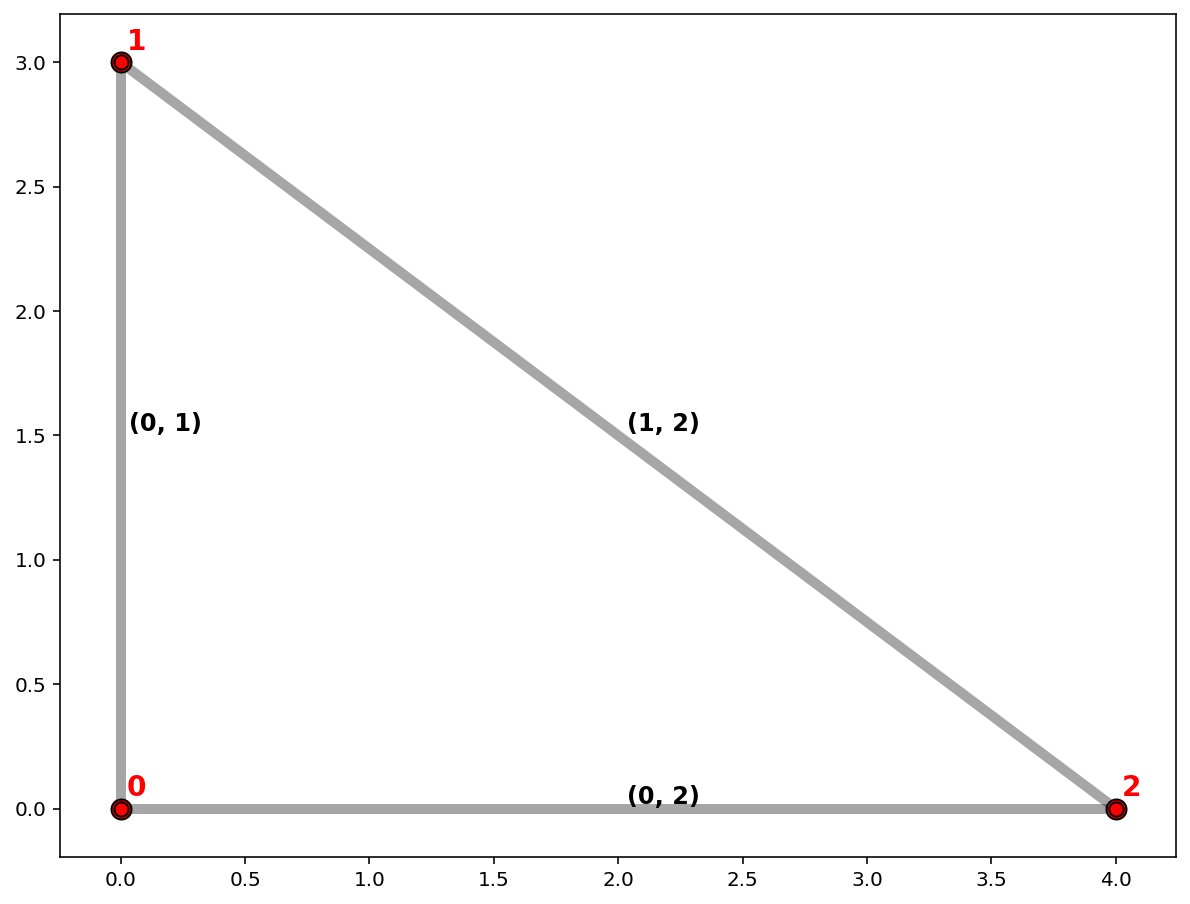

In [73]:
base = arcs_df.plot(figsize=(10, 10), linewidth=5, color="k", alpha=.35, zorder=0)
vertices_df.plot(ax=base, facecolor="r", edgecolor="k", markersize=100, zorder=2)
vertices_df.plot(ax=base, fc="r", ec="k", markersize=50, zorder=2)
# arc labels
arc_labels(arcs_df, base, 12)
# vertex labels
vert_labels(vertices_df, base, 14)

#### An arc-based [spatial weights](https://pysal.org/libpysal/generated/libpysal.weights.W.html#libpysal.weights.W) attribute is generated with network instantiaton—``w_network``.

In [74]:
ntw.w_network

In [75]:
print(dir(ntw.w_network))

['_W__get_id_order', '_W__neighbors_0', '_W__set_id_order', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_sparse', '_cache', '_cardinalities', '_component_labels', '_id2i', '_id_order', '_id_order_set', '_n', '_n_components', '_reset', '_sparse', '_transform', 'asymmetries', 'asymmetry', 'cardinalities', 'component_labels', 'diagW2', 'diagWtW', 'diagWtW_WW', 'from_WSP', 'from_adjlist', 'from_file', 'from_networkx', 'from_shapefile', 'full', 'get_transform', 'histogram', 'id2i', 'id_order', 'id_order_set', 'islands', 'max_neighbors', 'mean_neighbors', 'min_neighbors', 'n', 'n_components', 'neighbor_offsets', 'neighbors', 'nonzero', 'pct_nonzero', 'plot', 'rema

#### The ``plot()`` method in the ``libpysal.weights.W`` class can be used along with a [geopandas.GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe) to visualize contiguity.

# arcs labeled on weight nodes
# nodes labled
# function for plotting ...

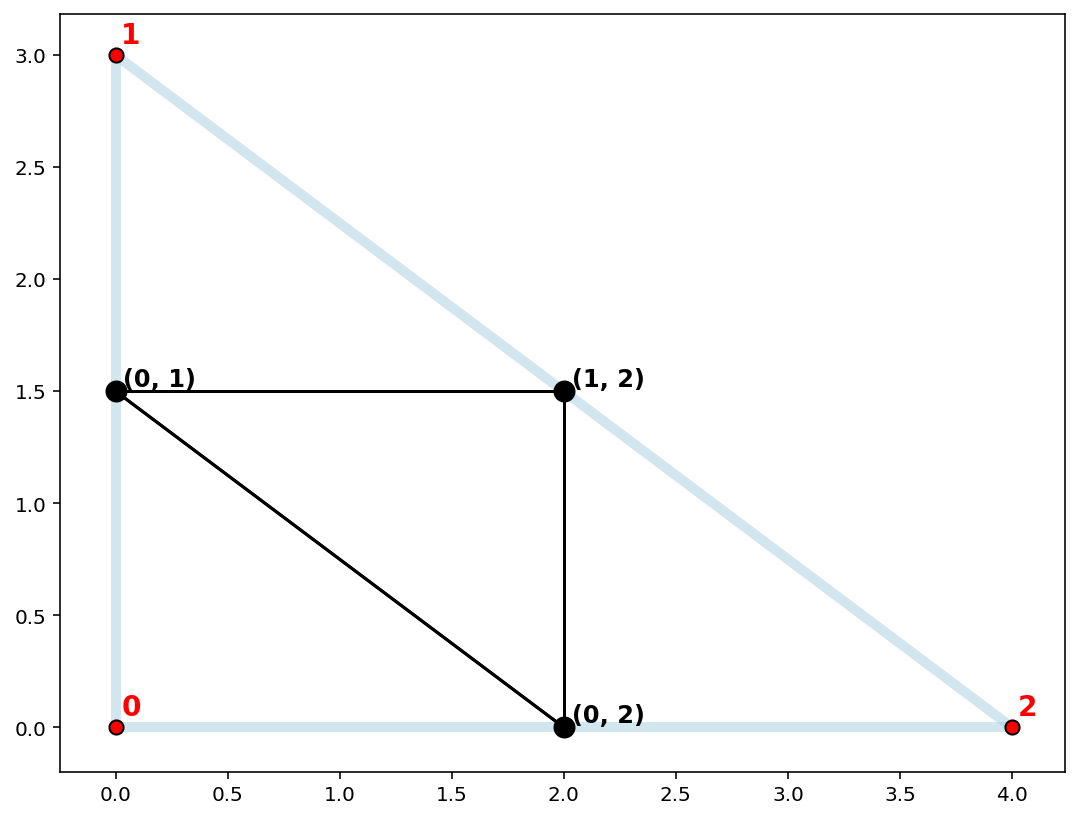

In [76]:
base_kws = {"alpha":.5, "lw":5, "cmap":"Paired", "column":"comp_label"}
base = arcs_df.plot(figsize=(9, 9), zorder=0, **base_kws)
# plot keywords
node_kws, edge_kws = {"s":100, "zorder":2}, {"zorder":1}
w_kws = {"edge_kws":edge_kws, "node_kws":node_kws}
ntw.w_network.plot(arcs_df, indexed_on="id", ax=base, **w_kws)
vertices_df.plot(ax=base, fc="r", ec="k", markersize=50, zorder=2)
# arc labels
arc_labels(arcs_df, base, 12)
# vertex labels
vert_labels(vertices_df, base, 14)

-----------------------
### 2. Regular lattice

#### Generate a ``spaghetti.Network`` from a 4x4 regular lattice and plot

In [77]:
lattice = spaghetti.regular_lattice((0,0,3,3), 2, exterior=True)
ntw = spaghetti.Network(in_data=lattice)

In [78]:
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

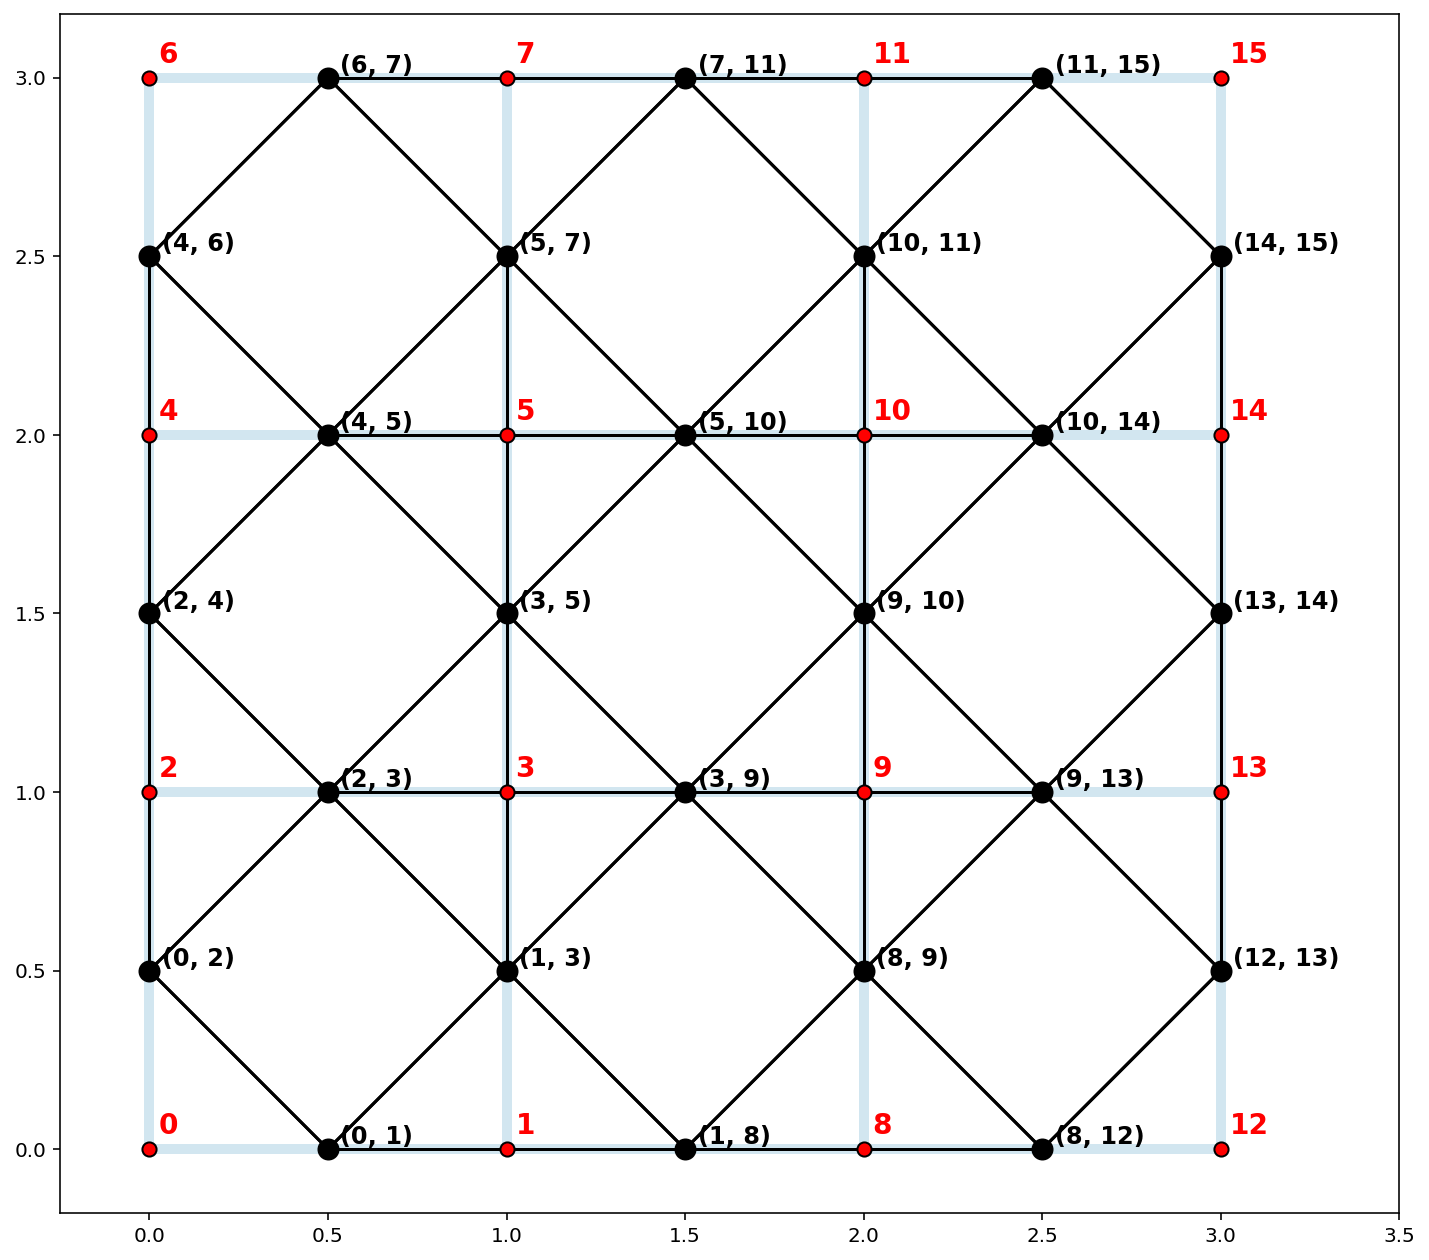

In [79]:
base_kws = {"alpha":.5, "lw":5, "cmap":"Paired", "column":"comp_label"}
base = arcs_df.plot(figsize=(12, 12), zorder=0, **base_kws)
# plot keywords
node_kws, edge_kws = {"s":100, "zorder":2}, {"zorder":1}
w_kws = {"edge_kws":edge_kws, "node_kws":node_kws}
ntw.w_network.plot(arcs_df, indexed_on="id", ax=base, **w_kws)
vertices_df.plot(ax=base, fc="r", ec="k", markersize=50, zorder=2)
# arc labels
arc_labels(arcs_df, base, 12)
# vertex labels
vert_labels(vertices_df, base, 14)

plt.xlim(-0.25, 3.5);

#### Plot only the arc weights

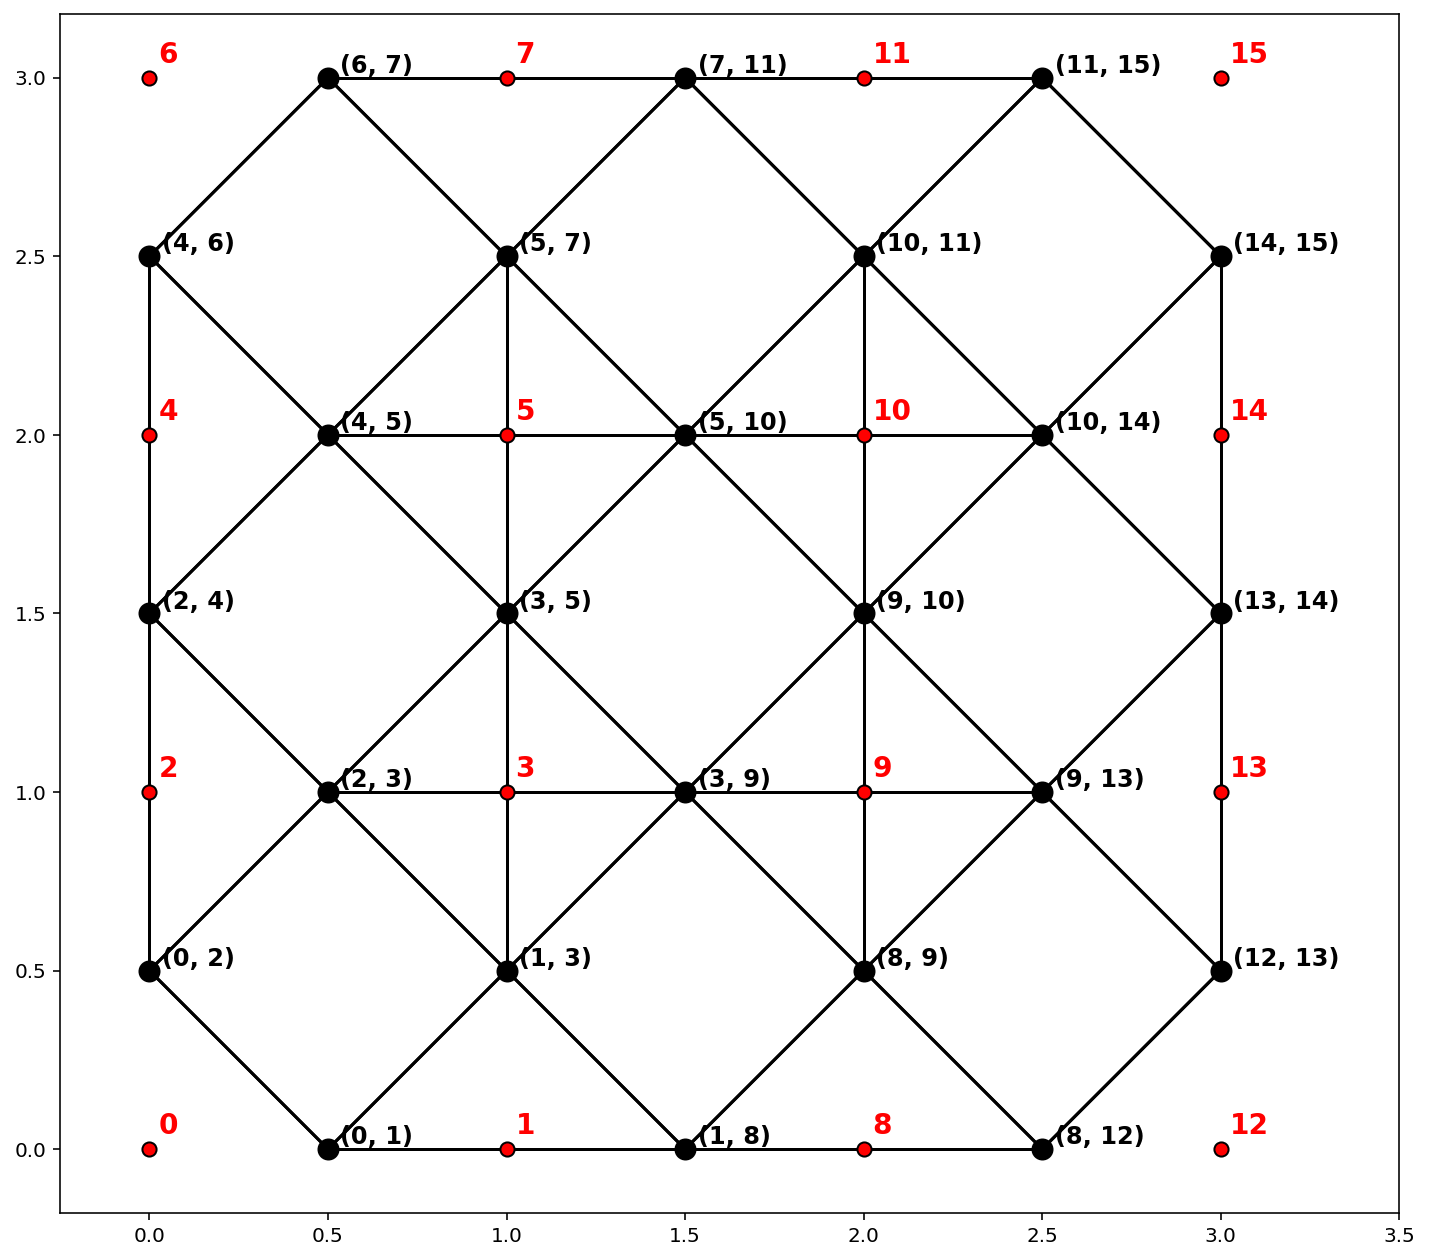

In [81]:
base_kws = {"alpha":.0, "lw":5, "cmap":"Paired", "column":"comp_label"}
base = arcs_df.plot(figsize=(12, 12), zorder=0, **base_kws)
# plot keywords
node_kws, edge_kws = {"s":100, "zorder":2}, {"zorder":1}
w_kws = {"edge_kws":edge_kws, "node_kws":node_kws}
ntw.w_network.plot(arcs_df, indexed_on="id", ax=base, **w_kws)
vertices_df.plot(ax=base, fc="r", ec="k", markersize=50, zorder=2)
# arc labels
arc_labels(arcs_df, base, 12)
# vertex labels
vert_labels(vertices_df, base, 14)

plt.xlim(-0.25, 3.5);

-----------------------
### 3. Emprical Example — [geodanet/streets.shp](https://github.com/pysal/libpysal/tree/master/libpysal/examples/geodanet)

#### Read in a ``libpysal.example`` and create a ``spaghetti.Network``, then plot.

In [ ]:
ntw = spaghetti.Network(in_data=libpysal.examples.get_path("streets.shp"))

------------------